In [123]:
#import modules
import pandas as pd
import numpy as np
import re

# Custom preprocessing function
from utils import preprocess_text


# Vectorization methods
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#import libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import os
print(os.getcwd())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import logging
import pickle
import pprint
from textblob import TextBlob
import re
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Custom preprocessing function
from utils import preprocess_text
import sys
import os



c:\Users\user\Downloads\AI Siminar\AI-Seminar-Project\Finance


In [215]:

# Add the directory containing `utils` to the system path
sys.path.append(os.path.abspath(r"C:\Users\user\Downloads\AI Siminar\AI-Seminar-Project\Finance\utils.py"))

# Now try importing preprocess_text
from utils import preprocess_text


In [216]:
with open(r"C:\Users\user\Downloads\motley-fool-data.pkl\motley-fool-data.pkl", "rb") as file:
    data = pickle.load(file)

data

,date,exchange,q,ticker,transcript
0,"Aug 27, 2020, 9:00 p.m. ET",NASDAQ: BILI,2020-Q2,BILI,"Prepared Remarks:\nOperator\nGood day, and wel..."
1,"Jul 30, 2020, 4:30 p.m. ET",NYSE: GFF,2020-Q3,GFF,Prepared Remarks:\nOperator\nThank you for sta...
2,"Oct 23, 2019, 5:00 p.m. ET",NASDAQ: LRCX,2020-Q1,LRCX,Prepared Remarks:\nOperator\nGood day and welc...
3,"Nov 6, 2019, 12:00 p.m. ET",NASDAQ: BBSI,2019-Q3,BBSI,"Prepared Remarks:\nOperator\nGood day, everyon..."
4,"Aug 7, 2019, 8:30 a.m. ET",NASDAQ: CSTE,2019-Q2,CSTE,Prepared Remarks:\nOperator\nGreetings and wel...
...,...,...,...,...,...
18750,"Nov 9, 2021, 1:00 p.m. ET",NYSE: SWX,2021-Q3,SWX,Prepared Remarks:\nOperator\nLadies and gentle...
18751,"Nov 18, 2021, 12:00 p.m. ET",NYSE: PNNT,2021-Q4,PNNT,"Prepared Remarks:\nOperator\nGood morning, and..."
18752,"Feb 08, 2022, 11:00 a.m. ET",NYSE: TDG,2022-Q1,TDG,Prepared Remarks:\nOperator\nThank you for sta...
18753,"Feb 28, 2022, 4:30 p.m. ET",NASDAQ: DVAX,2021-Q4,DVAX,"Prepared Remarks:\nOperator\nGood day, ladies ..."


In [232]:
transcript_list= pd.read_csv('transcript_list_allyear.csv')
transcript_list.head(10)
print(transcript_list['transcript'][0])

Prepared Remarks:
Operator
Ladies and gentlemen, thank you for standing by, and welcome to the Walgreens Boots Alliance, Inc. Third Quarter 2021 Earnings Conference Call. [Operator Instructions]. After the speakers' presentation, there will be a question-and-answer session. [Operator Instructions]. I would now like to hand the conference over to Gerald Gradwell, Thank you. You may begin, sir.
Gerald Gradwell -- Senior Vice President of Investor Relations and Special Projects
Good morning, ladies and gentlemen, and welcome to our earnings call for the third quarter of fiscal year 2021. On the call with me today are Roz Brewer, the Chief Executive Officer of Walgreens Boots Alliance; James Kehoe, Global Chief Financial Officer; and John Standley, President of Walgreens is also here for any relevant questions.
Before I hand you over to Roz to make some opening comments, I will, as usual, take you through the legal safe harbor and cautionary declarations. Certain statements and projections

In [233]:
transcript_list

,date,exchange,q,Symbol,transcript,char_count,call_date
0,"Jul 1, 2021, 8:30 a.m. ET",NASDAQ: WBA,2021-Q3,WBA,Prepared Remarks:\nOperator\nLadies and gentle...,55722,2021-07-01
1,"Apr 30, 2020, 5:00 p.m. ET",NASDAQ: AAPL,2020-Q2,AAPL,"Prepared Remarks:\nOperator\nGood day, everyon...",48549,2020-04-30
2,"Feb 4, 2020, 5:00 p.m. ET",NYSE: F,2019-Q4,F,"Prepared Remarks:\nOperator\nGood day, ladies ...",60764,2020-02-04
3,"Mar 02, 2021, 9:00 a.m. ET",NYSE: TGT,2020-Q4,TGT,"Prepared Remarks:\nJohn Hulbert\nGood morning,...",121703,2021-03-02
4,"Apr 19, 2021, 8:30 a.m. ET",NYSE: KO,2021-Q1,KO,"Prepared Remarks:\nOperator\nAt this time, I'd...",60260,2021-04-19
...,...,...,...,...,...,...,...
774,"Oct 27, 2022, 5:00 p.m. ET",NYSE: COF,2022-Q3,COF,"Prepared Remarks:\nOperator\nGood day, and tha...",69486,2022-10-27
775,"Jan 24, 2023, 8:00 a.m. ET",NYSE: GE,2022-Q4,GE,"Prepared Remarks:\nOperator\nGood day, ladies ...",46562,2023-01-24
776,"Dec 12, 2022, 5:00 p.m. ET",NYSE: ORCL,2023-Q2,ORCL,"Prepared Remarks:\nOperator\nGood afternoon, l...",43443,2022-12-12
777,"Sep 13, 2021, 5:00 p.m. ET",NYSE: ORCL,2022-Q1,ORCL,Prepared Remarks:\nOperator\nWelcome to Oracle...,29246,2021-09-13


In [237]:
transcript_list_2020 = transcript_list

In [239]:
# reference link-https://stackoverflow.com/questions/8376691/how-to-remove-hashtag-user-link-of-a-tweet-using-regular-expression
# function to remove punctuation
import re,string
#('[^\w\s]','')
def strip_links(text):
    link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#',""]
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)

<>:6: SyntaxWarning: invalid escape sequence '\w'
<>:6: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_3340\3498983011.py:6: SyntaxWarning: invalid escape sequence '\w'
  link_regex    =  re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)


In [240]:
#apply function above to transcript column
transcript_list_2020['no_punctuation']=transcript_list_2020['transcript'].map(lambda x:strip_all_entities(strip_links(x)))

print(transcript_list_2020['no_punctuation'][0:6])

0    Prepared Remarks Operator Ladies and gentlemen...
1    Prepared Remarks Operator Good day everyone We...
2    Prepared Remarks Operator Good day ladies and ...
3    Prepared Remarks John Hulbert Good morning eve...
4    Prepared Remarks Operator At this time I d lik...
5    Prepared Remarks Operator Thank you for standi...
Name: no_punctuation, dtype: object


In [241]:
#remove quotes and apostrophes
transcript_list_2020['no_punctuation']=transcript_list_2020['no_punctuation'].str.replace('[^\w\s]','')
print(transcript_list_2020['no_punctuation'][0:6])

0    Prepared Remarks Operator Ladies and gentlemen...
1    Prepared Remarks Operator Good day everyone We...
2    Prepared Remarks Operator Good day ladies and ...
3    Prepared Remarks John Hulbert Good morning eve...
4    Prepared Remarks Operator At this time I d lik...
5    Prepared Remarks Operator Thank you for standi...
Name: no_punctuation, dtype: object


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
C:\Users\user\AppData\Local\Temp\ipykernel_3340\678054542.py:2: SyntaxWarning: invalid escape sequence '\w'
  transcript_list_2020['no_punctuation']=transcript_list_2020['no_punctuation'].str.replace('[^\w\s]','')


In [242]:
#preprocess latest transcriped list with preprocess function in utils.py file

transcript_list_2020['preprocess_trans']= transcript_list_2020['no_punctuation'].apply(lambda x : ' '.join(preprocess_text(x, min_word_length=4)))
print(transcript_list_2020['preprocess_trans'][0:6])

0    prepare remark operator lady gentleman thank s...
1    prepare remark operator good everyone welcome ...
2    prepare remark operator good lady gentleman we...
3    prepare remark john hulbert good morning every...
4    prepare remark operator time welcome everyone ...
5    prepare remark operator thank stand good every...
Name: preprocess_trans, dtype: object


In [243]:
transcript_list_2020

,date,exchange,q,Symbol,transcript,char_count,call_date,no_punctuation,preprocess_trans
0,"Jul 1, 2021, 8:30 a.m. ET",NASDAQ: WBA,2021-Q3,WBA,Prepared Remarks:\nOperator\nLadies and gentle...,55722,2021-07-01,Prepared Remarks Operator Ladies and gentlemen...,prepare remark operator lady gentleman thank s...
1,"Apr 30, 2020, 5:00 p.m. ET",NASDAQ: AAPL,2020-Q2,AAPL,"Prepared Remarks:\nOperator\nGood day, everyon...",48549,2020-04-30,Prepared Remarks Operator Good day everyone We...,prepare remark operator good everyone welcome ...
2,"Feb 4, 2020, 5:00 p.m. ET",NYSE: F,2019-Q4,F,"Prepared Remarks:\nOperator\nGood day, ladies ...",60764,2020-02-04,Prepared Remarks Operator Good day ladies and ...,prepare remark operator good lady gentleman we...
3,"Mar 02, 2021, 9:00 a.m. ET",NYSE: TGT,2020-Q4,TGT,"Prepared Remarks:\nJohn Hulbert\nGood morning,...",121703,2021-03-02,Prepared Remarks John Hulbert Good morning eve...,prepare remark john hulbert good morning every...
4,"Apr 19, 2021, 8:30 a.m. ET",NYSE: KO,2021-Q1,KO,"Prepared Remarks:\nOperator\nAt this time, I'd...",60260,2021-04-19,Prepared Remarks Operator At this time I d lik...,prepare remark operator time welcome everyone ...
...,...,...,...,...,...,...,...,...,...
774,"Oct 27, 2022, 5:00 p.m. ET",NYSE: COF,2022-Q3,COF,"Prepared Remarks:\nOperator\nGood day, and tha...",69486,2022-10-27,Prepared Remarks Operator Good day and thank y...,prepare remark operator good thank stand welco...
775,"Jan 24, 2023, 8:00 a.m. ET",NYSE: GE,2022-Q4,GE,"Prepared Remarks:\nOperator\nGood day, ladies ...",46562,2023-01-24,Prepared Remarks Operator Good day ladies and ...,prepare remark operator good lady gentleman we...
776,"Dec 12, 2022, 5:00 p.m. ET",NYSE: ORCL,2023-Q2,ORCL,"Prepared Remarks:\nOperator\nGood afternoon, l...",43443,2022-12-12,Prepared Remarks Operator Good afternoon ladie...,prepare remark operator good afternoon lady ge...
777,"Sep 13, 2021, 5:00 p.m. ET",NYSE: ORCL,2022-Q1,ORCL,Prepared Remarks:\nOperator\nWelcome to Oracle...,29246,2021-09-13,Prepared Remarks Operator Welcome to Oracle s ...,prepare remark operator welcome oracle first q...


In [244]:
# removal words used infrequently @10% of the amount of transcripts

in_freq_words = pd.Series(' '.join(transcript_list_2020['preprocess_trans']).split()).value_counts()[-400:]
in_freq_words.head()

proppant     1
relooked     1
paysafe      1
raid         1
wellbores    1
Name: count, dtype: int64

In [245]:
# Ensure `in_freq_words` is correctly generated as a list
in_freq_words = (
    pd.Series(' '.join(transcript_list_2020['preprocess_trans']).split())
    .value_counts()
    .iloc[-400:]
    .index.tolist()  # Convert index to a list
)


In [246]:
# list frequent words @10% of the amount of transcripts

freq_words = pd.Series(' '.join(transcript_list_2020['preprocess_trans']).split()).value_counts()[400:]
freq_words.head()

group    1733
unit     1727
find     1724
small    1722
clear    1720
Name: count, dtype: int64

In [247]:

transcript_list_2020['clean_trans'] = transcript_list_2020['preprocess_trans'].apply(lambda x: " ".join(x for x in x.split() if x not in in_freq_words))
transcript_list_2020['clean_trans'].head()

0    prepare remark operator lady gentleman thank s...
1    prepare remark operator good everyone welcome ...
2    prepare remark operator good lady gentleman we...
3    prepare remark john hulbert good morning every...
4    prepare remark operator time welcome everyone ...
Name: clean_trans, dtype: object

In [248]:
#list to include most common words
all_words = []
for line in list(transcript_list_2020['clean_trans']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
print(all_words[10])

featured_words = list(all_words)[:1000]
print(featured_words)

alliance
['prepare', 'remark', 'operator', 'lady', 'gentleman', 'thank', 'stand', 'welcome', 'walgreens', 'boot', 'alliance', 'third', 'quarter', 'earnings', 'conference', 'call', 'operator', 'instruction', 'speaker', 'presentation', 'question', 'answer', 'session', 'operator', 'instruction', 'hand', 'conference', 'gerald', 'gradwell', 'thank', 'begin', 'gerald', 'gradwell', 'senior', 'vice', 'president', 'investor', 'relation', 'special', 'project', 'good', 'morning', 'lady', 'gentleman', 'welcome', 'earnings', 'call', 'third', 'quarter', 'fiscal', 'year', 'call', 'today', 'brewer', 'chief', 'executive', 'officer', 'walgreens', 'boot', 'alliance', 'kehoe', 'global', 'chief', 'financial', 'officer', 'john', 'standley', 'president', 'walgreens', 'relevant', 'question', 'hand', 'open', 'comment', 'usual', 'legal', 'safe', 'harbor', 'cautionary', 'declaration', 'certain', 'statement', 'projection', 'future', 'result', 'presentation', 'constitute', 'forward', 'statement', 'base', 'current'

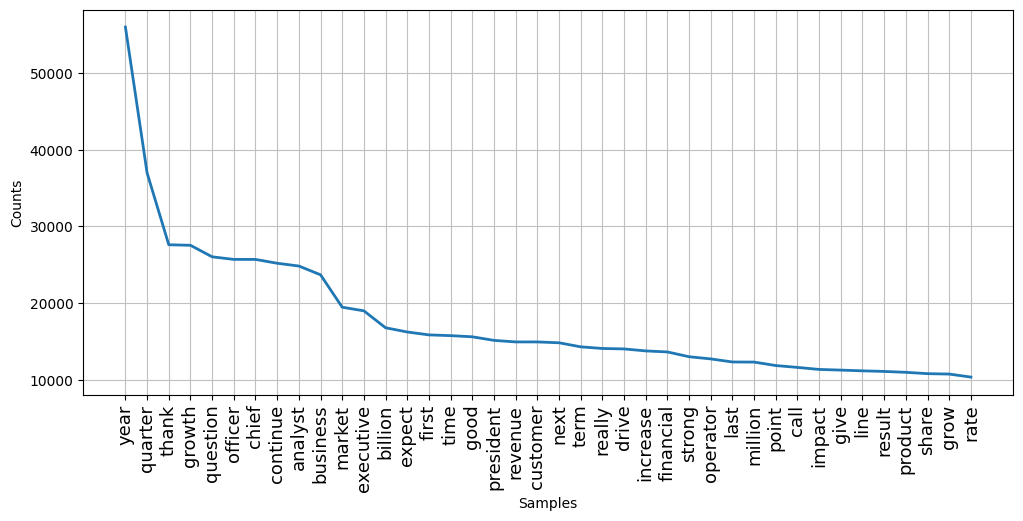

In [249]:
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,5))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
#display top word frequency of the top 40 words
fd.plot(40,cumulative=False)

# Exports graph as a png image file
plt.savefig("Fig7_Top40Words_FullTranscipt_all.png")

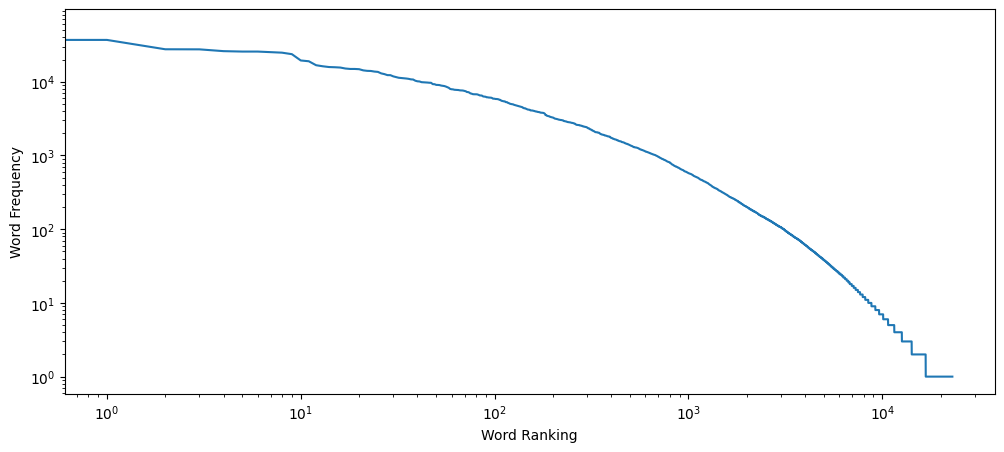

In [250]:
# log-log of all words
from collections import Counter
word_counts = sorted(Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel("Word Frequency")
plt.xlabel("Word Ranking")

# Exports graph as a png image file
plt.savefig("Fig8_WordFreqandRank_FullTranscript_allyear.png")

In [252]:
#verify latest dataframe column output
transcript_list_2020

,date,exchange,q,Symbol,transcript,char_count,call_date,no_punctuation,preprocess_trans,clean_trans
0,"Jul 1, 2021, 8:30 a.m. ET",NASDAQ: WBA,2021-Q3,WBA,Prepared Remarks:\nOperator\nLadies and gentle...,55722,2021-07-01,Prepared Remarks Operator Ladies and gentlemen...,prepare remark operator lady gentleman thank s...,prepare remark operator lady gentleman thank s...
1,"Apr 30, 2020, 5:00 p.m. ET",NASDAQ: AAPL,2020-Q2,AAPL,"Prepared Remarks:\nOperator\nGood day, everyon...",48549,2020-04-30,Prepared Remarks Operator Good day everyone We...,prepare remark operator good everyone welcome ...,prepare remark operator good everyone welcome ...
2,"Feb 4, 2020, 5:00 p.m. ET",NYSE: F,2019-Q4,F,"Prepared Remarks:\nOperator\nGood day, ladies ...",60764,2020-02-04,Prepared Remarks Operator Good day ladies and ...,prepare remark operator good lady gentleman we...,prepare remark operator good lady gentleman we...
3,"Mar 02, 2021, 9:00 a.m. ET",NYSE: TGT,2020-Q4,TGT,"Prepared Remarks:\nJohn Hulbert\nGood morning,...",121703,2021-03-02,Prepared Remarks John Hulbert Good morning eve...,prepare remark john hulbert good morning every...,prepare remark john hulbert good morning every...
4,"Apr 19, 2021, 8:30 a.m. ET",NYSE: KO,2021-Q1,KO,"Prepared Remarks:\nOperator\nAt this time, I'd...",60260,2021-04-19,Prepared Remarks Operator At this time I d lik...,prepare remark operator time welcome everyone ...,prepare remark operator time welcome everyone ...
...,...,...,...,...,...,...,...,...,...,...
774,"Oct 27, 2022, 5:00 p.m. ET",NYSE: COF,2022-Q3,COF,"Prepared Remarks:\nOperator\nGood day, and tha...",69486,2022-10-27,Prepared Remarks Operator Good day and thank y...,prepare remark operator good thank stand welco...,prepare remark operator good thank stand welco...
775,"Jan 24, 2023, 8:00 a.m. ET",NYSE: GE,2022-Q4,GE,"Prepared Remarks:\nOperator\nGood day, ladies ...",46562,2023-01-24,Prepared Remarks Operator Good day ladies and ...,prepare remark operator good lady gentleman we...,prepare remark operator good lady gentleman we...
776,"Dec 12, 2022, 5:00 p.m. ET",NYSE: ORCL,2023-Q2,ORCL,"Prepared Remarks:\nOperator\nGood afternoon, l...",43443,2022-12-12,Prepared Remarks Operator Good afternoon ladie...,prepare remark operator good afternoon lady ge...,prepare remark operator good afternoon lady ge...
777,"Sep 13, 2021, 5:00 p.m. ET",NYSE: ORCL,2022-Q1,ORCL,Prepared Remarks:\nOperator\nWelcome to Oracle...,29246,2021-09-13,Prepared Remarks Operator Welcome to Oracle s ...,prepare remark operator welcome oracle first q...,prepare remark operator welcome oracle first q...


In [253]:
#remove stop words
from sklearn.feature_extraction import text #import package

skl_stopwords = text.ENGLISH_STOP_WORDS
#print(skl_stopwords)

from nltk.corpus import stopwords # for excluding the stopwords

#creating an object using the default nltk stopwords
nltk_stopwords = stopwords.words("english")
print(nltk_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [254]:
#remove stop words from latest cleaned transcript
transcript_list_2020['clean_trans2']=transcript_list_2020['clean_trans'].apply(lambda x: " ".join(x for x in x.split() if x not in nltk_stopwords))
transcript_list_2020['clean_trans2'][:6]

0    prepare remark operator lady gentleman thank s...
1    prepare remark operator good everyone welcome ...
2    prepare remark operator good lady gentleman we...
3    prepare remark john hulbert good morning every...
4    prepare remark operator time welcome everyone ...
5    prepare remark operator thank stand good every...
Name: clean_trans2, dtype: object

In [255]:
from sklearn.feature_extraction.text import CountVectorizer

# Now eliminaing customized stop words
count_vect = CountVectorizer(binary=False, stop_words = nltk_stopwords) 

count_vect_custom_stopwords = count_vect.fit_transform(transcript_list_2020['clean_trans2'])
print(count_vect_custom_stopwords.shape)
print(count_vect_custom_stopwords)

# Use `get_feature_names_out` to get feature names
names = count_vect.get_feature_names_out()

count = np.sum(count_vect_custom_stopwords.toarray(), axis = 0) 
count2 = count.tolist() 



(779, 22983)
  (0, 15684)	4
  (0, 17004)	4
  (0, 14169)	19
  (0, 10974)	2
  (0, 8169)	2
  (0, 20474)	41
  (0, 19377)	2
  (0, 22471)	3
  (0, 22303)	12
  (0, 2496)	11
  (0, 800)	4
  (0, 20534)	15
  (0, 16208)	76
  (0, 6181)	8
  (0, 4158)	2
  (0, 2957)	14
  (0, 9987)	3
  (0, 19165)	1
  (0, 15721)	6
  (0, 16226)	43
  (0, 1104)	4
  (0, 18430)	1
  (0, 8699)	5
  (0, 8203)	4
  (0, 8433)	3
  :	:
  (778, 15206)	1
  (778, 18180)	2
  (778, 18675)	1
  (778, 20953)	1
  (778, 18204)	1
  (778, 12219)	1
  (778, 9819)	1
  (778, 20781)	2
  (778, 13481)	1
  (778, 12863)	1
  (778, 16628)	1
  (778, 8165)	1
  (778, 16025)	13
  (778, 22779)	1
  (778, 10461)	1
  (778, 15424)	1
  (778, 19863)	2
  (778, 21422)	1
  (778, 22203)	1
  (778, 22258)	1
  (778, 12211)	1
  (778, 20368)	1
  (778, 13357)	1
  (778, 9027)	1
  (778, 1524)	3


In [256]:
#dataframe of output
count_df = pd.DataFrame(count2, index = names, columns = ['Word Count']) 
#  top 20 features by count
count_df.sort_values(['Word Count'], ascending = False)[:20]


,Word Count
year,56015
quarter,36978
thank,27609
growth,27538
question,26033
officer,25697
chief,25695
continue,25194
analyst,24832
business,23689


In [257]:
transcript_list_2020.head(5)

,date,exchange,q,Symbol,transcript,char_count,call_date,no_punctuation,preprocess_trans,clean_trans,clean_trans2
0,"Jul 1, 2021, 8:30 a.m. ET",NASDAQ: WBA,2021-Q3,WBA,Prepared Remarks:\nOperator\nLadies and gentle...,55722,2021-07-01,Prepared Remarks Operator Ladies and gentlemen...,prepare remark operator lady gentleman thank s...,prepare remark operator lady gentleman thank s...,prepare remark operator lady gentleman thank s...
1,"Apr 30, 2020, 5:00 p.m. ET",NASDAQ: AAPL,2020-Q2,AAPL,"Prepared Remarks:\nOperator\nGood day, everyon...",48549,2020-04-30,Prepared Remarks Operator Good day everyone We...,prepare remark operator good everyone welcome ...,prepare remark operator good everyone welcome ...,prepare remark operator good everyone welcome ...
2,"Feb 4, 2020, 5:00 p.m. ET",NYSE: F,2019-Q4,F,"Prepared Remarks:\nOperator\nGood day, ladies ...",60764,2020-02-04,Prepared Remarks Operator Good day ladies and ...,prepare remark operator good lady gentleman we...,prepare remark operator good lady gentleman we...,prepare remark operator good lady gentleman we...
3,"Mar 02, 2021, 9:00 a.m. ET",NYSE: TGT,2020-Q4,TGT,"Prepared Remarks:\nJohn Hulbert\nGood morning,...",121703,2021-03-02,Prepared Remarks John Hulbert Good morning eve...,prepare remark john hulbert good morning every...,prepare remark john hulbert good morning every...,prepare remark john hulbert good morning every...
4,"Apr 19, 2021, 8:30 a.m. ET",NYSE: KO,2021-Q1,KO,"Prepared Remarks:\nOperator\nAt this time, I'd...",60260,2021-04-19,Prepared Remarks Operator At this time I d lik...,prepare remark operator time welcome everyone ...,prepare remark operator time welcome everyone ...,prepare remark operator time welcome everyone ...


In [258]:
#VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in 
#social media and generalizes to multiple domains. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally 
#labelled according to their semantic orientation as either positive or negative.http://comp.social.gatech.edu/papers/icwsm14.vader.hutto.pdf
#VADER does not require training data and is constructed from a generalizable, valence-based, human curated standard sentiment lexicon

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def getSentimentScores(text):
    score=SentimentIntensityAnalyzer()
    #dictionary
    sentiment_dict=score.polarity_scores(text)
    print(sentiment_dict)
    print(f'positive sentiment: {sentiment_dict["pos"]*100}, %positive')
    print(f'neutral sentiment: {sentiment_dict["neu"]*100}, %neutral')
    print(f'negative sentiment: {sentiment_dict["neg"]*100}, %negative')
    #decide sentiment 
    if sentiment_dict['compound'] > 0.075:
        print ('Positive')
    elif sentiment_dict['compound'] < 0.025:
        print ('Negative')
    else: 
        print ('Neutral')
    return sentiment_dict

In [259]:
###modified 2
transcript_list_2020['sentiment_compound']=transcript_list_2020['clean_trans2'].apply(lambda x: getSentimentScores(x)['compound'])

{'neg': 0.031, 'neu': 0.708, 'pos': 0.261, 'compound': 1.0}
positive sentiment: 26.1, %positive
neutral sentiment: 70.8, %neutral
negative sentiment: 3.1, %negative
Positive
{'neg': 0.035, 'neu': 0.739, 'pos': 0.225, 'compound': 1.0}
positive sentiment: 22.5, %positive
neutral sentiment: 73.9, %neutral
negative sentiment: 3.5000000000000004, %negative
Positive
{'neg': 0.032, 'neu': 0.7, 'pos': 0.268, 'compound': 1.0}
positive sentiment: 26.8, %positive
neutral sentiment: 70.0, %neutral
negative sentiment: 3.2, %negative
Positive
{'neg': 0.027, 'neu': 0.706, 'pos': 0.267, 'compound': 1.0}
positive sentiment: 26.700000000000003, %positive
neutral sentiment: 70.6, %neutral
negative sentiment: 2.7, %negative
Positive
{'neg': 0.025, 'neu': 0.702, 'pos': 0.273, 'compound': 1.0}
positive sentiment: 27.3, %positive
neutral sentiment: 70.19999999999999, %neutral
negative sentiment: 2.5, %negative
Positive
{'neg': 0.041, 'neu': 0.704, 'pos': 0.255, 'compound': 1.0}
positive sentiment: 25.5, %pos

In [260]:
###modified 2
transcript_list_2020['sentiment_pos']=transcript_list_2020['clean_trans2'].apply(lambda x: getSentimentScores(x)['pos'])

{'neg': 0.031, 'neu': 0.708, 'pos': 0.261, 'compound': 1.0}
positive sentiment: 26.1, %positive
neutral sentiment: 70.8, %neutral
negative sentiment: 3.1, %negative
Positive
{'neg': 0.035, 'neu': 0.739, 'pos': 0.225, 'compound': 1.0}
positive sentiment: 22.5, %positive
neutral sentiment: 73.9, %neutral
negative sentiment: 3.5000000000000004, %negative
Positive
{'neg': 0.032, 'neu': 0.7, 'pos': 0.268, 'compound': 1.0}
positive sentiment: 26.8, %positive
neutral sentiment: 70.0, %neutral
negative sentiment: 3.2, %negative
Positive
{'neg': 0.027, 'neu': 0.706, 'pos': 0.267, 'compound': 1.0}
positive sentiment: 26.700000000000003, %positive
neutral sentiment: 70.6, %neutral
negative sentiment: 2.7, %negative
Positive
{'neg': 0.025, 'neu': 0.702, 'pos': 0.273, 'compound': 1.0}
positive sentiment: 27.3, %positive
neutral sentiment: 70.19999999999999, %neutral
negative sentiment: 2.5, %negative
Positive
{'neg': 0.041, 'neu': 0.704, 'pos': 0.255, 'compound': 1.0}
positive sentiment: 25.5, %pos

In [261]:
###modified 2
transcript_list_2020['sentiment_neg']=transcript_list_2020['clean_trans2'].apply(lambda x: getSentimentScores(x)['neg'])

{'neg': 0.031, 'neu': 0.708, 'pos': 0.261, 'compound': 1.0}
positive sentiment: 26.1, %positive
neutral sentiment: 70.8, %neutral
negative sentiment: 3.1, %negative
Positive
{'neg': 0.035, 'neu': 0.739, 'pos': 0.225, 'compound': 1.0}
positive sentiment: 22.5, %positive
neutral sentiment: 73.9, %neutral
negative sentiment: 3.5000000000000004, %negative
Positive
{'neg': 0.032, 'neu': 0.7, 'pos': 0.268, 'compound': 1.0}
positive sentiment: 26.8, %positive
neutral sentiment: 70.0, %neutral
negative sentiment: 3.2, %negative
Positive
{'neg': 0.027, 'neu': 0.706, 'pos': 0.267, 'compound': 1.0}
positive sentiment: 26.700000000000003, %positive
neutral sentiment: 70.6, %neutral
negative sentiment: 2.7, %negative
Positive
{'neg': 0.025, 'neu': 0.702, 'pos': 0.273, 'compound': 1.0}
positive sentiment: 27.3, %positive
neutral sentiment: 70.19999999999999, %neutral
negative sentiment: 2.5, %negative
Positive
{'neg': 0.041, 'neu': 0.704, 'pos': 0.255, 'compound': 1.0}
positive sentiment: 25.5, %pos

In [262]:

###modified 2
transcript_list_2020['sentiment_neu']=transcript_list_2020['clean_trans2'].apply(lambda x: getSentimentScores(x)['neu'])

{'neg': 0.031, 'neu': 0.708, 'pos': 0.261, 'compound': 1.0}
positive sentiment: 26.1, %positive
neutral sentiment: 70.8, %neutral
negative sentiment: 3.1, %negative
Positive
{'neg': 0.035, 'neu': 0.739, 'pos': 0.225, 'compound': 1.0}
positive sentiment: 22.5, %positive
neutral sentiment: 73.9, %neutral
negative sentiment: 3.5000000000000004, %negative
Positive
{'neg': 0.032, 'neu': 0.7, 'pos': 0.268, 'compound': 1.0}
positive sentiment: 26.8, %positive
neutral sentiment: 70.0, %neutral
negative sentiment: 3.2, %negative
Positive
{'neg': 0.027, 'neu': 0.706, 'pos': 0.267, 'compound': 1.0}
positive sentiment: 26.700000000000003, %positive
neutral sentiment: 70.6, %neutral
negative sentiment: 2.7, %negative
Positive
{'neg': 0.025, 'neu': 0.702, 'pos': 0.273, 'compound': 1.0}
positive sentiment: 27.3, %positive
neutral sentiment: 70.19999999999999, %neutral
negative sentiment: 2.5, %negative
Positive
{'neg': 0.041, 'neu': 0.704, 'pos': 0.255, 'compound': 1.0}
positive sentiment: 25.5, %pos

In [263]:
transcript_list_2020.head(3)


,date,exchange,q,Symbol,transcript,char_count,call_date,no_punctuation,preprocess_trans,clean_trans,clean_trans2,sentiment_compound,sentiment_pos,sentiment_neg,sentiment_neu
0,"Jul 1, 2021, 8:30 a.m. ET",NASDAQ: WBA,2021-Q3,WBA,Prepared Remarks:\nOperator\nLadies and gentle...,55722,2021-07-01,Prepared Remarks Operator Ladies and gentlemen...,prepare remark operator lady gentleman thank s...,prepare remark operator lady gentleman thank s...,prepare remark operator lady gentleman thank s...,1.0,0.261,0.031,0.708
1,"Apr 30, 2020, 5:00 p.m. ET",NASDAQ: AAPL,2020-Q2,AAPL,"Prepared Remarks:\nOperator\nGood day, everyon...",48549,2020-04-30,Prepared Remarks Operator Good day everyone We...,prepare remark operator good everyone welcome ...,prepare remark operator good everyone welcome ...,prepare remark operator good everyone welcome ...,1.0,0.225,0.035,0.739
2,"Feb 4, 2020, 5:00 p.m. ET",NYSE: F,2019-Q4,F,"Prepared Remarks:\nOperator\nGood day, ladies ...",60764,2020-02-04,Prepared Remarks Operator Good day ladies and ...,prepare remark operator good lady gentleman we...,prepare remark operator good lady gentleman we...,prepare remark operator good lady gentleman we...,1.0,0.268,0.032,0.700


In [264]:
transcript_list_2020.columns

Index(['date', 'exchange', 'q', 'Symbol', 'transcript', 'char_count',
       'call_date', 'no_punctuation', 'preprocess_trans', 'clean_trans',
       'clean_trans2', 'sentiment_compound', 'sentiment_pos', 'sentiment_neg',
       'sentiment_neu'],
      dtype='object')

In [265]:
transcribed_list_sent = transcript_list_2020.drop(
    ['transcript', 'char_count', 
     'no_punctuation', 'preprocess_trans', 'clean_trans', 
     'sentiment_compound'], 
    axis=1  # Explicitly specify this is for columns
)

transcribed_list_sent.head(3)


,date,exchange,q,Symbol,call_date,clean_trans2,sentiment_pos,sentiment_neg,sentiment_neu
0,"Jul 1, 2021, 8:30 a.m. ET",NASDAQ: WBA,2021-Q3,WBA,2021-07-01,prepare remark operator lady gentleman thank s...,0.261,0.031,0.708
1,"Apr 30, 2020, 5:00 p.m. ET",NASDAQ: AAPL,2020-Q2,AAPL,2020-04-30,prepare remark operator good everyone welcome ...,0.225,0.035,0.739
2,"Feb 4, 2020, 5:00 p.m. ET",NYSE: F,2019-Q4,F,2020-02-04,prepare remark operator good lady gentleman we...,0.268,0.032,0.700


In [266]:
transcribed_list_sent.to_csv('full_transcript_sents_allyear.csv')

In [267]:
full_transcript_sents=pd.read_csv('full_transcript_sents_allyear.csv')

In [268]:
transcript_list_2020[['sentiment_neu',
       'sentiment_neg', 'sentiment_pos']].describe()

,sentiment_neu,sentiment_neg,sentiment_pos
count,779.000000,779.000000,779.000000
mean,0.715112,0.033465,0.251425
std,0.023546,0.011737,0.027209
min,0.620000,0.009000,0.161000
25%,0.700000,0.025000,0.234000
50%,0.714000,0.032000,0.253000
75%,0.729000,0.040000,0.269000
max,0.817000,0.091000,0.347000


In [269]:
#read list of words for positive and negative descriptors from a high level language dictionary
HLpos = [line.strip() for line in  open('positive.txt','r')]
HLneg = [line.strip() for line in  open('neg.txt','r',encoding = 'latin-1')]
print("HL pos  size: " + str(len(HLpos)))
print(HLpos[0:10])
print("HL neg  size: " + str(len(HLneg)))
print(HLneg[0:10])

HL pos  size: 2006
['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation']
HL neg  size: 4783
['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted']


In [270]:
# depending on word count assign a tone across the scores from words in the dictionary
def hl_sent(inputstring):
    poscount = 0
    negcount = 0
    for word in inputstring.split(): 
        if HLpos.count(word.rstrip('?:!.,;')):
            poscount +=1
        elif HLneg.count(word.rstrip('?:!.,;')):
            negcount +=1
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    #set tone based on mean of summary of scores in .describe above
    if t > 0.20:
        tone = "Positive"
    elif t < 0.04:
        tone = "Negative"
    else:
        tone = "Neutral"
    return tone

In [271]:
#takes a little longer - needs to check multiple lists
transcribed_list_sent['sentimentsHL'] = transcribed_list_sent.clean_trans2.apply(lambda x: hl_sent(x))
#then use following code to see both columns 
transcribed_list_sent.iloc[0:10][['clean_trans2', 
       'sentiment_pos', 'sentiment_neg', 'sentiment_neu']]



,clean_trans2,sentiment_pos,sentiment_neg,sentiment_neu
0,prepare remark operator lady gentleman thank s...,0.261,0.031,0.708
1,prepare remark operator good everyone welcome ...,0.225,0.035,0.739
2,prepare remark operator good lady gentleman we...,0.268,0.032,0.700
3,prepare remark john hulbert good morning every...,0.267,0.027,0.706
4,prepare remark operator time welcome everyone ...,0.273,0.025,0.702
5,prepare remark operator thank stand good every...,0.255,0.041,0.704
6,prepare remark operator good morning regina co...,0.240,0.042,0.718
7,prepare remark operator lady gentleman thank s...,0.205,0.046,0.749
8,prepare remark operator good thank stand welco...,0.250,0.031,0.718
9,prepare remark operator good lady gentleman we...,0.250,0.033,0.717


In [272]:
transcribed_list_sent['sentimentsHL'].value_counts()

sentimentsHL
Positive    771
Neutral       8
Name: count, dtype: int64

In [273]:
transcribed_list_sent

,date,exchange,q,Symbol,call_date,clean_trans2,sentiment_pos,sentiment_neg,sentiment_neu,sentimentsHL
0,"Jul 1, 2021, 8:30 a.m. ET",NASDAQ: WBA,2021-Q3,WBA,2021-07-01,prepare remark operator lady gentleman thank s...,0.261,0.031,0.708,Positive
1,"Apr 30, 2020, 5:00 p.m. ET",NASDAQ: AAPL,2020-Q2,AAPL,2020-04-30,prepare remark operator good everyone welcome ...,0.225,0.035,0.739,Positive
2,"Feb 4, 2020, 5:00 p.m. ET",NYSE: F,2019-Q4,F,2020-02-04,prepare remark operator good lady gentleman we...,0.268,0.032,0.700,Positive
3,"Mar 02, 2021, 9:00 a.m. ET",NYSE: TGT,2020-Q4,TGT,2021-03-02,prepare remark john hulbert good morning every...,0.267,0.027,0.706,Positive
4,"Apr 19, 2021, 8:30 a.m. ET",NYSE: KO,2021-Q1,KO,2021-04-19,prepare remark operator time welcome everyone ...,0.273,0.025,0.702,Positive
...,...,...,...,...,...,...,...,...,...,...
774,"Oct 27, 2022, 5:00 p.m. ET",NYSE: COF,2022-Q3,COF,2022-10-27,prepare remark operator good thank stand welco...,0.256,0.046,0.698,Positive
775,"Jan 24, 2023, 8:00 a.m. ET",NYSE: GE,2022-Q4,GE,2023-01-24,prepare remark operator good lady gentleman we...,0.279,0.038,0.683,Positive
776,"Dec 12, 2022, 5:00 p.m. ET",NYSE: ORCL,2023-Q2,ORCL,2022-12-12,prepare remark operator good afternoon lady ge...,0.195,0.032,0.773,Positive
777,"Sep 13, 2021, 5:00 p.m. ET",NYSE: ORCL,2022-Q1,ORCL,2021-09-13,prepare remark operator welcome oracle first q...,0.206,0.032,0.763,Positive


In [274]:
#read list of words for positive and negative descriptors in the Loughran and McDonald Sentiment Word Lists.
#The essential method of textual analysis goes by various labels in other disciplines such as content analysis, natural 
#language processing, information retrieval, or computational linguistics.  A growing literature finds significant relations 
#between stock price reactions and the sentiment of information releases as measured by word classifications.
#https://sraf.nd.edu/textual-analysis/resources/#Master%20Dictionary
LM_positive = [line.strip() for line in  open('LoughranMcDonald_PositiveList.txt','r')]
LM_negative = [line.strip() for line in  open('LoughranMcDonald_NegativeList.txt','r',encoding = 'latin-1')]
print("LM pos  size: " + str(len(LM_positive)))
print(LM_positive[0:10])
print("LM neg  size: " + str(len(LM_negative)))
print(LM_negative[0:10])

LM pos  size: 354
['able', 'abundance', 'abundant', 'acclaimed', 'accomplish', 'accomplished', 'accomplishes', 'accomplishing', 'accomplishment', 'accomplishments']
LM neg  size: 2355
['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated', 'abdicates', 'abdicating', 'abdication']


In [275]:
def LM_sentimental(inputstring):
    poscount = 0
    negcount = 0
    for word in inputstring.split(): 
        if LM_positive.count(word.rstrip('?:!.,;')):
            poscount +=1
        elif LM_negative.count(word.rstrip('?:!.,;')):
            negcount +=1
    if poscount+negcount > 0:
        t = float((poscount - negcount)/(poscount+negcount))    
    else:
        t = 0
    if t > 0.20:
        tone = "Positive"
    elif t < 0.04:
        tone = "Negative"
    else:
        tone = "Neutral"
    return tone

In [276]:
transcribed_list_sent['LM_sentiments'] = transcribed_list_sent.clean_trans2.apply(lambda x: LM_sentimental(x))

In [277]:
transcribed_list_sent.tail(3)

,date,exchange,q,Symbol,call_date,clean_trans2,sentiment_pos,sentiment_neg,sentiment_neu,sentimentsHL,LM_sentiments
776,"Dec 12, 2022, 5:00 p.m. ET",NYSE: ORCL,2023-Q2,ORCL,2022-12-12,prepare remark operator good afternoon lady ge...,0.195,0.032,0.773,Positive,Positive
777,"Sep 13, 2021, 5:00 p.m. ET",NYSE: ORCL,2022-Q1,ORCL,2021-09-13,prepare remark operator welcome oracle first q...,0.206,0.032,0.763,Positive,Neutral
778,"Aug 24, 2022, 5:00 p.m. ET",NASDAQ: NVDA,2023-Q2,NVDA,2022-08-24,prepare remark operator good afternoon regina ...,0.181,0.043,0.776,Positive,Negative


In [281]:
transcribed_list_sent['sentimentsHL'].value_counts()

sentimentsHL
Positive    771
Neutral       8
Name: count, dtype: int64

In [279]:
transcribed_list_sent.to_csv('full_transcript_LMsentment_all.csv')

In [280]:
sent_test= pd.read_csv('full_transcript_LMsentment_all.csv')
sent_test.head(10)

,Unnamed: 0,date,exchange,q,Symbol,call_date,clean_trans2,sentiment_pos,sentiment_neg,sentiment_neu,sentimentsHL,LM_sentiments
0,0,"Jul 1, 2021, 8:30 a.m. ET",NASDAQ: WBA,2021-Q3,WBA,2021-07-01,prepare remark operator lady gentleman thank s...,0.261,0.031,0.708,Positive,Positive
1,1,"Apr 30, 2020, 5:00 p.m. ET",NASDAQ: AAPL,2020-Q2,AAPL,2020-04-30,prepare remark operator good everyone welcome ...,0.225,0.035,0.739,Positive,Neutral
2,2,"Feb 4, 2020, 5:00 p.m. ET",NYSE: F,2019-Q4,F,2020-02-04,prepare remark operator good lady gentleman we...,0.268,0.032,0.700,Positive,Positive
3,3,"Mar 02, 2021, 9:00 a.m. ET",NYSE: TGT,2020-Q4,TGT,2021-03-02,prepare remark john hulbert good morning every...,0.267,0.027,0.706,Positive,Positive
4,4,"Apr 19, 2021, 8:30 a.m. ET",NYSE: KO,2021-Q1,KO,2021-04-19,prepare remark operator time welcome everyone ...,0.273,0.025,0.702,Positive,Positive
5,5,"Oct 27, 2022, 5:30 p.m. ET",NASDAQ: AMZN,2022-Q3,AMZN,2022-10-27,prepare remark operator thank stand good every...,0.255,0.041,0.704,Positive,Positive
6,6,"Jul 14, 2021, 11:30 a.m. ET",NYSE: WFC,2021-Q2,WFC,2021-07-14,prepare remark operator good morning regina co...,0.240,0.042,0.718,Positive,Positive
7,7,"Aug 04, 2020, 4:30 p.m. ET",NYSE: DIS,2020-Q3,DIS,2020-08-04,prepare remark operator lady gentleman thank s...,0.205,0.046,0.749,Positive,Neutral
8,8,"May 13, 2021, 4:30 p.m. ET",NYSE: DIS,2021-Q2,DIS,2021-05-13,prepare remark operator good thank stand welco...,0.250,0.031,0.718,Positive,Positive
9,9,"Jul 27, 2021, 8:30 a.m. ET",NYSE: RTX,2021-Q2,RTX,2021-07-27,prepare remark operator good lady gentleman we...,0.250,0.033,0.717,Positive,Positive
